In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from operator import add,truediv

In [23]:
url = 'http://dados.natal.br/dataset/4fad551d-4d3b-4597-b8d3-7e887e22332e/resource/ec5b95a3-7b93-4346-98f6-1bd013faa651/download/dados-be-2018-analitico.csv'
df = pd.read_csv(url,encoding='ISO-8859–1', sep=';', thousands='.')

In [71]:
print(df)

     Mês            Empresa  Linha  Estudante_Cartao  Estudante_BT  \
0      1          CONCEIÇÃO     21             13493          9506   
1      1          CONCEIÇÃO     22              4644          3371   
2      1          CONCEIÇÃO     30              8519          5614   
3      1          CONCEIÇÃO     31              9631          6020   
4      1          CONCEIÇÃO     41              6556          4038   
5      1          CONCEIÇÃO     59              8184          6086   
6      1          CONCEIÇÃO     63             21918         14054   
7      1          CONCEIÇÃO     71              7188          5395   
8      1          CONCEIÇÃO     76              2886          1734   
9      1          CONCEIÇÃO     83              4386          3932   
10     1          CONCEIÇÃO    411              5208          2869   
11     1          CONCEIÇÃO    587                 0             0   
12     1          CONCEIÇÃO    599              5074          3082   
13     1          CO

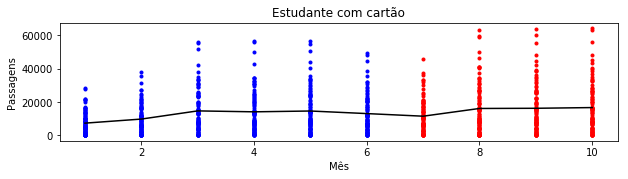

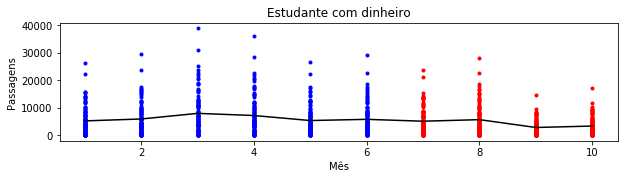

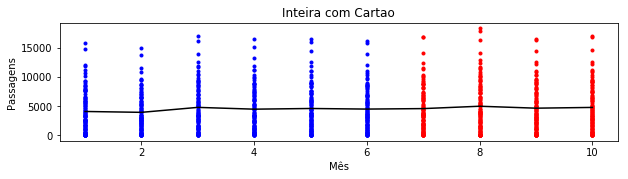

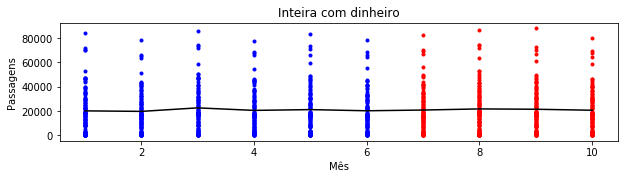

In [89]:
stud_avg_card = []
stud_avg_cash = []

full_fare_avg_card = []
full_fare_avg_cash = []

for month in df['Mês'].unique():
    stud_avg_card.append(int(sum(df[df['Mês'] == month]['Estudante_Cartao'])/len(df[df['Mês'] == month])))
    stud_avg_cash.append(int(sum(df[df['Mês'] == month]['Estudante_BT'])/len(df[df['Mês'] == month])))
    full_fare_avg_card.append(int(sum(df[df['Mês'] == month]['Inteira_Cartao'])/len(df[df['Mês'] == month])))
    full_fare_avg_cash.append(int(sum(df[df['Mês'] == month]['Inteira_Especie'])/len(df[df['Mês'] == month])))


plt.figure(figsize=(10,10))    
    
plt.subplot(411)
plt.plot(df[df['Mês'] < 7]['Mês'], df[df['Mês'] < 7]['Estudante_Cartao'],'b.')
plt.plot(df[df['Mês'] >= 7]['Mês'], df[df['Mês'] >= 7]['Estudante_Cartao'],'r.')
plt.plot(df['Mês'].unique(), stud_avg_card, 'k-')
plt.title('Estudante com cartão')
plt.ylabel('Passagens')
plt.xlabel('Mês')
plt.show()

plt.figure(figsize=(10,10))

plt.subplot(412)
plt.plot(df[df['Mês'] < 7]['Mês'], df[df['Mês'] < 7]['Estudante_BT'],'b.')
plt.plot(df[df['Mês'] >= 7]['Mês'], df[df['Mês'] >= 7]['Estudante_BT'],'r.')
plt.plot(df['Mês'].unique(), stud_avg_cash, 'k-')
plt.title('Estudante com dinheiro')
plt.ylabel('Passagens')
plt.xlabel('Mês')
plt.show()

plt.figure(figsize=(10,10))

plt.subplot(413)
plt.plot(df[df['Mês'] < 7]['Mês'], df[df['Mês'] < 7]['Inteira_Cartao'],'b.')
plt.plot(df[df['Mês'] >= 7]['Mês'], df[df['Mês'] >= 7]['Inteira_Cartao'],'r.')
plt.plot(df['Mês'].unique(), full_fare_avg_card, 'k-')
plt.title('Inteira com cartão')
plt.ylabel('Passagens')
plt.xlabel('Mês')
plt.show()

plt.figure(figsize=(10,10))

plt.subplot(414)
plt.plot(df[df['Mês'] < 7]['Mês'], df[df['Mês'] < 7]['Inteira_Especie'],'b.')
plt.plot(df[df['Mês'] >= 7]['Mês'], df[df['Mês'] >= 7]['Inteira_Especie'],'r.')
plt.plot(df['Mês'].unique(), full_fare_avg_cash, 'k-')
plt.title('Inteira com dinheiro')
plt.ylabel('Passagens')
plt.xlabel('Mês')
plt.show()



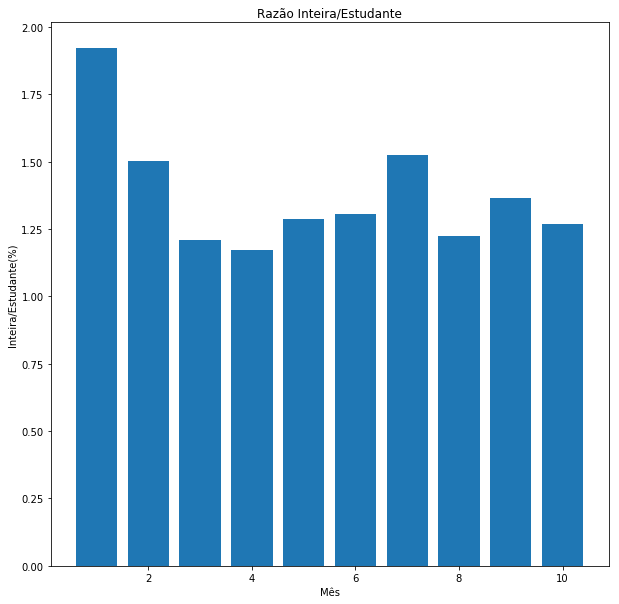

In [105]:
student_total = list(map(add, stud_avg_card, stud_avg_cash))
full_fare_total = list(map(add, full_fare_avg_card, full_fare_avg_cash))
ratio = list(map(truediv,full_fare_total,student_total))

plt.figure(figsize=(10,10))

plt.bar(df['Mês'].unique(),ratio)
plt.title('Razão Inteira/Estudante')
plt.ylabel('Inteira/Estudante')
plt.xlabel('Mês')
plt.show()